In [1]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange
import math
import scipy


In [2]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()
    

In [3]:
res = np.random.uniform(0, 5, 1000000)
 
# посмотрим на первые десять значений
res[:1]

array([4.07049586])

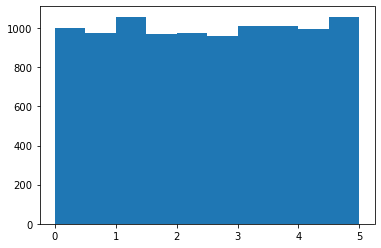

In [4]:
plt.hist(res[:10000])
plt.show()

In [5]:
import random #метод обратных функций
def random_values_generator(left, right, attmp): 
    res = []
    for i in range(1, attmp):
        value = (right - left) * random.random() + left
        res.append(value)
    return res

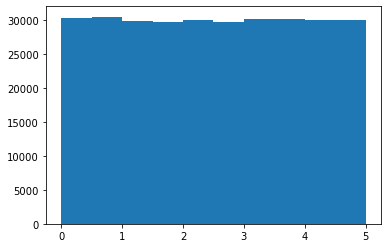

In [6]:
left = 0 
right = 5
attmp = 300000

res = random_values_generator(left, right, attmp)
plt.hist(res)
plt.show()

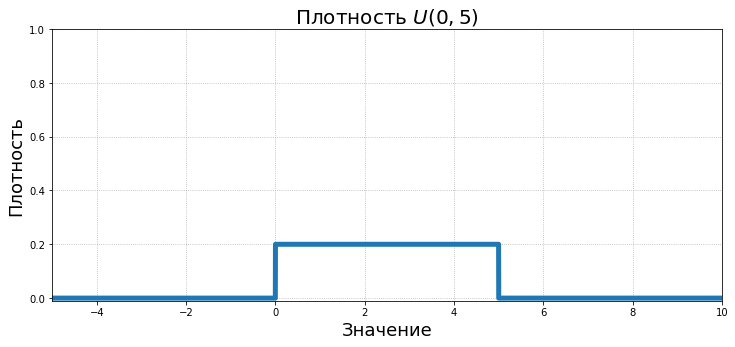

In [7]:
show_pdf(
    pdf=sps.uniform.pdf, xmin=left - 5, xmax=right + 5, ymax=1, grid_size=10000, 
    distr_name=r'$U(0, 5)$', loc=left, scale=right
)

In [8]:
M = (left + right) / 2 # мат ожидание


In [9]:
D = (right - left) * (right - left) / 12 # дисперсия


In [10]:
import math
SC = (right - left) / (2 * math.sqrt(3)) 
print(M, D, SC)

2.5 2.0833333333333335 1.4433756729740645


In [11]:
m = 0.0 #несмещенная оценка матожидания 
d = 0.0 # смещенная оценка дисперсии
sc = 0
for i in res:
    m = m + i
m = m / attmp  

for i in res:
    d = d + math.pow((i - m), 2)
d = d / attmp

sc = math.sqrt(d)

print(m, d, sc)


2.4967279642093367 2.093823643254064 1.447005059857796


In [12]:
# точеные оценки right, left
a1 = m - math.sqrt(3)*sc
a2 = m + math.sqrt(3)*sc
print(a1, a2)


-0.009558318273610311 5.003014246692284


In [13]:
# доверительный интервал right
mx=res[0]
for i in res:
    if i > mx: 
        mx = i

y = 0.90
e1 = (1 - y) / 2
e2 = e1

print('%s, %s'%(mx / (math.pow((1 - e2),1 / attmp)), mx / (math.pow(e1, 1/attmp)  ) ))

4.999982580566619, 5.0000316546194625


In [14]:
a = 0.95 #уровень значимости
k = 9 # кол-во степеней свободы
#найдем предполагаемую плотность
f = 1 / (a2 - a1)
print(f)



    



0.19949835878471797


In [15]:
from scipy import stats
def chiSquareValue(self, alpha, freedom):
    return stats.chi2.ppf(alpha, freedom)


In [16]:
print(stats.chi2.ppf(0.95, attmp - 3))

301272.227785623


In [17]:
res.sort()

In [18]:
# прооверка гипотезы (нахождение хи-квадрат эмпирического и теор)
xhi = 0
sm = 0
for i, val in enumerate(res):
    if i + 1 >= len(res): break
    n_i = attmp * f * (res[i + 1] - res[i])
    sm += n_i
    xhi = xhi + (n_i - round(n_i)) * (n_i - round(n_i)) / n_i
print(xhi, sm/attmp)
print(xhi < stats.chi2.ppf(0.95, attmp - 3))

43313.69882483941 0.9974866744508074
True


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


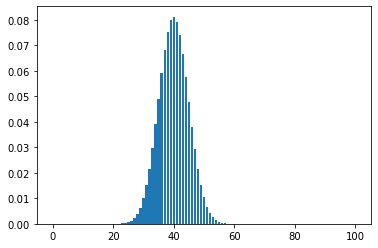

In [30]:
n = 100
p = 0.4
def factorial(n):
    x = 1
    for i in range(1, n+1):
        x *= i
    return x

def combination(n, k):
    return factorial(n)/(factorial(k)*factorial(n-k))

def binompmf(k,n,p):
    return combination(n,k)*(p**k)*((1-p)**(n-k))

r = list(range(n + 1))
dist = [binompmf(k, n, p) for k in r]
import matplotlib.pyplot as plt

print(r)
plt.bar(r, dist)
plt.show()

[6, 5, 6, 7, 9, 5, 8, 5, 7, 2, 6, 4, 4, 6, 8, 4, 8, 10, 3, 6, 6, 4, 7, 7, 5, 6, 5, 7, 5, 7, 4, 4, 6, 4, 7, 8, 4, 4, 5, 9, 5, 7, 8, 9, 5, 7, 3, 7, 4, 2, 6, 3, 4, 9, 6, 3, 5, 8, 9, 4, 1, 4, 5, 6, 4, 9, 7, 8, 5, 7, 5, 5, 5, 6, 5, 8, 3, 7, 5, 4, 6, 5, 4, 7, 8, 5, 6, 5, 3, 7, 3, 8, 8, 7, 4, 6, 9, 7, 6, 7, 3, 9, 3, 4, 3, 5, 3, 5, 3, 6, 3, 3, 4, 5, 8, 4, 6, 5, 4, 8, 7, 5, 5, 4, 3, 4, 6, 6, 5, 4, 8, 4, 8, 5, 1, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 4, 7, 8, 4, 5, 7, 6, 5, 6, 5, 7, 6, 5, 5, 2, 6, 4, 4, 5, 5, 3, 8, 5, 7, 7, 3, 8, 5, 4, 5, 6, 8, 2, 6, 5, 4, 2, 5, 6, 7, 5, 6, 7, 8, 9, 7, 5, 5, 7, 5, 7, 4, 2, 6, 6, 11, 8, 7, 6, 9, 6, 7, 4, 4, 6, 8, 7, 6, 4, 3, 6, 5, 8, 10, 7, 5, 4, 8, 2, 6, 7, 7, 6, 4, 6, 7, 3, 3, 5, 5, 5, 5, 5, 4, 8, 5, 5, 7, 7, 5, 8, 1, 7, 3, 6, 6, 5, 4, 5, 6, 7, 5, 7, 5, 8, 5, 8, 3, 3, 4, 8, 1, 6, 3, 8, 5, 7, 7, 10, 9, 3, 3, 3, 5, 6, 6, 6, 4, 5, 8, 8, 5, 6, 9, 6, 2, 4, 6, 2, 7, 5, 4, 4, 2, 5, 2, 5, 5, 5, 8, 5, 5, 5, 5, 2, 8, 6, 2, 7, 6, 3, 6, 4, 6, 6, 5, 7, 6, 7, 9, 3, 3, 6, 8, 7, 4, 6,

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

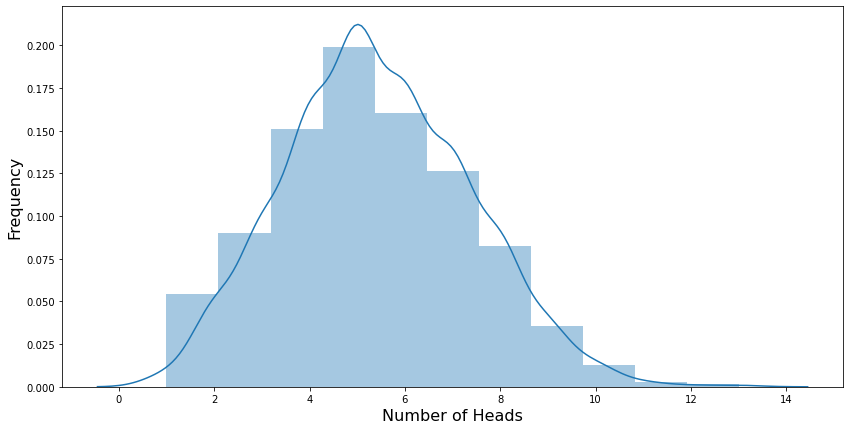

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Input variables
# Number of trials
trials = 1000
# Number of independent experiments in each trial
n = 18
# Probability of success for each experiment
p = 0.3
# Function that runs our coin toss trials
# heads is a list of the number of successes from each trial of n experiments
def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i<=p]))
        # print(tosses)
    return heads
# Run the function
heads = run_binom(trials, n, p)
# Plot the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
print(heads)
ax = sns.distplot(heads, bins=11, label='simulation results')
ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
    

In [21]:
# Дисперс8ия и мат ожидание (теоретические)
D_binom = n*p*(1-p)
M_binom = n*p
print(M_binom, D_binom)

5.3999999999999995 3.7799999999999994


In [22]:
# точечные оценки
m_binom = 0
d_binom = 0
for i in range(0, len(heads)):
    m_binom += heads[i]
m_binom /= trials

for i in range(0, len(heads)):
    d_binom += math.pow((heads[i] - m_binom), 2)
d_binom /= (trials - 1)

print(m_binom, d_binom)

def count_happened(A):
    m = 0
    for i in range(0, len(heads)):
        if heads[i] == A: m += 1 
    return m 

#интервальная оценка параметра A
A = 6

p = 0.95
t = 1.96
 
W = count_happened(A) / trials

delta = t * math.pow(((W * (1 - W)) / trials), 1/2)

print('Доверительный интервал для A =', A, ' p = ', p, ':')
print('(', W - delta, ', ', W + delta, ')')
print(W)



5.434 3.6913353353353435
Доверительный интервал для A = 6  p =  0.95 :
( 0.15144939491223208 ,  0.1985506050877679 )
0.175


In [24]:
prob = 0.3

xhi = 0
for i in range(0, n):
    n_i = count_happened(i) / trials
    if n_i!=0: xhi = xhi + (n_i - binompmf(i,n,prob)) * (n_i - binompmf(i,n,prob)) / n_i
print(xhi)
print(xhi < stats.chi2.ppf(0.95, n - 3))

0.008045780869859966
True
